# 1. Introduction

## 1.1 Description

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.  

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.  

Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

## 1.2 Data Population

According to the problem, the data population is every passenger in the Titanic shipwreck.  
Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

# 2. Data

## 2.1 Kaggle

**Kaggle account:**
GuanchenZhao, DeyiZhou


---
**Comments**  
*Are you using a combined account? Please use the combined account to submit the work in stage-2*    


**<font color=red>Reply</font>**    
<font color=red>Two separate accounts are written in stage-1. Later, we will submit with ***GuanchenZhao***</font>.




## 2.2 Data Overview

There are three files in the data: (1) **train.csv**, (2) **test.csv**, and (3) **gender_submission.csv**.

#### 2.2.1 Train Data

train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table).    

For instance, the first passenger listed in train.csv is Braund, Mr. Owen Harris. He was 22 years old when he died on the Titanic.

import and show the train data.

In [ ]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

train_df = pd.read_csv('data/train.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


The columns are as follows.


|  Variable	| Definition | Value | 
|  ----  | ----  |----  |
|  PassengerId  | key  |number  |
| survival  | Survival |0 = No, 1 = Yes|
| pclass  | Ticket class |1st = Upper  ,  2nd = Middle,   3rd = Lower|
| sex  | sex |male, female |
| Age  | Age | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5|
| sibsp  | family relations| 1= Sibling or Spouse, 0=else  |
| parch  |  family relations  |1= Parent or Child,0=else |
| ticket  | Ticket number | Ticket number |
| fare  | Passenger fare |number |
| cabin  | 	Cabin number |Cabin number |
| embarked  | Port of Embarkation |C = Cherbourg, Q = Queenstown, S = Southampton |

#### 2.2.2 Test Data

The test.csv file is data that will be used to test the model. 

Import and show the train data.

In [ ]:
test_df = pd.read_csv('data/test.csv')

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The columns are as same as cloumns in train.csv. Note that test.csv does not have a "Survived" column - this information is hidden.

#### 2.2.3 Gender Submission

The gender_submission.csv file is provided as an example that shows the structure of predictions.  It predicts that all female passengers survived, and all male passengers died. 

the file contaions two columns.
*   "PassengerId": the IDs of each passenger from test.csv.
*   "Survived": the result.

Import and show the train data.

In [ ]:
gender_submission_df = pd.read_csv('data/gender_submission.csv')

gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 2.3 Data Wrangling

Check missing values

In [ ]:
missingvalues_train = train_df.isnull().sum()
missingvalues_train[missingvalues_train>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### 2.3.1 Structure

**Data Type**

We know that there are several types of data structures and we will distinguish the data in the table into the structure for subsequent data analysis.

Data Type :
* Quantitative Data - Age, Sibsp, Parch, Fare  
* Categorical Data (Nominal) - PassengerId, Ticket, Cabin, Embarked, Survived, Sex, Name
* Categorical Data (Ordinal) - Pclass

**How big is the data?**

In [ ]:
print( "train.csv file size is", len(train_df))

train.csv file size is 891


In [ ]:
print( "train.csv file size is", len(train_df))

train.csv file size is 891


In [ ]:
print( "gender_submission.csv file size is", len(gender_submission_df))

gender_submission.csv file size is 418


### 2.3.2 Granularity

The key is "PassengerId" -- the IDs of each passenger.   
 
According to the data, we can conclude that each line of the data contains the information of a passenger.

### 2.3.3 Scope

In [ ]:
survived_data = train_df['Survived']
print("Survived data scope:", survived_data.unique())

Survived data scope: [0 1]


In [ ]:
class_data = train_df['Pclass']
print("Class data scope:", np.sort(class_data.unique()))

Class data scope: [1 2 3]


In [ ]:
sex_data = train_df['Sex']
print("Sex data scope:", sex_data.unique())

Sex data scope: ['male' 'female']


In [ ]:
age_data = train_df[train_df['Age'].notna()]
age_data_1 = age_data['Age'].unique()
print("Age data scope:", age_data_1.min(), '-', age_data_1.max())

Age data scope: 0.42 - 80.0


In [ ]:
sibsp_data = train_df['SibSp']
print("Sibsp data scope:", np.sort(sibsp_data.unique()))

Sibsp data scope: [0 1 2 3 4 5 8]


In [ ]:
parch_data = train_df['Parch']
print("Parch data scope:", np.sort(parch_data.unique()))

Parch data scope: [0 1 2 3 4 5 6]


In [ ]:
fare_data = train_df[train_df['Fare'].notna()]
print(fare_data['Fare'].describe())
abs_fare = abs((fare_data['Fare'] - fare_data['Fare'].mean())/fare_data['Fare'].std())
fare_unusual = fare_data.loc[abs_fare>3]
print("\nFare data scope:", fare_data['Fare'].unique().min(), '-', fare_data['Fare'].unique().max())
print("\nUnusual fare data:", len(fare_unusual))

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Fare data scope: 0.0 - 512.3292

Unusual fare data: 20


In [ ]:
fare_unusual

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [ ]:
cabin_data = train_df['Cabin']
print("Unique Values:", len(cabin_data.unique()))

Unique Values: 148


In [ ]:
embarked_data = train_df['Embarked']
print("Embarked data scope:", embarked_data.unique())

Embarked data scope: ['S' 'C' 'Q' nan]


### 2.3.4 Temporality

In fact, the data in Titanic does not have much to do with timeliness, because no data in the table will be out of date. So we don't need to consider it in data analysis.

### 2.3.5 Faithfulness

Whether the data is reliable is very important. If the information is wrong, the result is meaningless.

**Name**

Check whether there are duplicate names in the table. If there are duplicate data, it needs to be deleted.


In [ ]:
name_data = train_df['Name']
if len(name_data)-len(name_data.unique()) == 0:
  print("No duplicate data in Name")
else:
  print("Duplicate data in Name")

No duplicate data in Name


**Age**

There are some numbers in the age record that are not integers.

In [ ]:
age_unusual = age_data.loc[age_data['Age']*100%100>0]
print("\nUnusual Age data:", len(age_unusual))


Unusual Age data: 25


In [ ]:
age_unusual

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,NaN,C
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,E101,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,F2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.50,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,NaN,S
203,204,0,3,"Youseff, Mr. Gerious",male,45.50,0,0,2628,7.2250,NaN,C


Other data cannot verify the correctness of the data. If recorder used paper to record, there may be some clerical errors. Or something else will happen, so we won’t consider it here for the time being.

## 2.4 Representative and Assumptions

**Representative**  
Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

The data is obtained representative.  
Survival may be different in other passenger groups not included in the training sample.

**Assumptions**      

*   **Correlating**. each feature correlate with Surviva.
*   The survival situation of the personnel not included in the training data is consistent with that of the personnel in the training data.



## 2.5 Sampling Method

stratified sampling.

Stratified sampling is a probability sampling technique wherein the researcher divides the entire population into different subgroups or strata, then randomly selects the final subjects proportionally from the different strata.

For example, We can clearly find that gender and cabin are two very important factors, which can be treated as the strata.



# 3. Data Transformation and EDA 

## 3.1 Transformation


In stage1, we have converted the data into DataFrame. Now, we are going to convert some string to number and process some continuous data.

In [ ]:
combine = [train_df, test_df]

**Sex**

Let us start by converting Sex feature to a new format.
     {'female': 1, 'male': 0}

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


**Age**

Age is a numerical continuous feature. However, we could easily find that Age contains missing or null values. We need to estimate and fill in these missing data.

Save the original age data in a new field *OriginAge*.

In [ ]:
train_df['OriginAge'] = train_df['Age']

*How to guess missing or null values?*

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

Method 2 is better.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


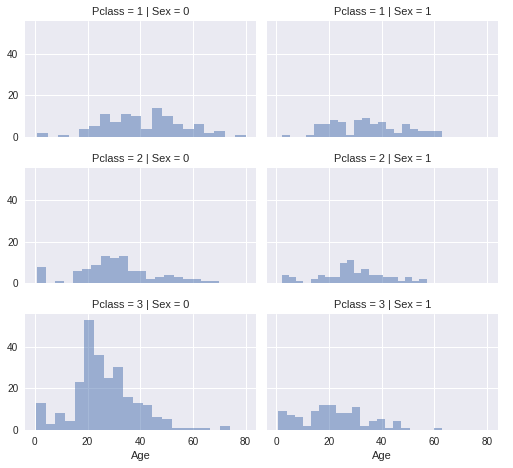

In [ ]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
guess_ages = np.zeros((2,3))

In [ ]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [ ]:

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

# replace Age with ordinals based on these bands.
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

# remove the AgeBand feature.
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OriginAge
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,35.0


**Embarked**

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OriginAge
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,35.0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,35.0


## 3.2 Features





In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OriginAge
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,35.0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,35.0


In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363



- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived. We decide to include this feature in our model.

 

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate.

Text(0.5, 1.0, 'The relationship between age and survival')

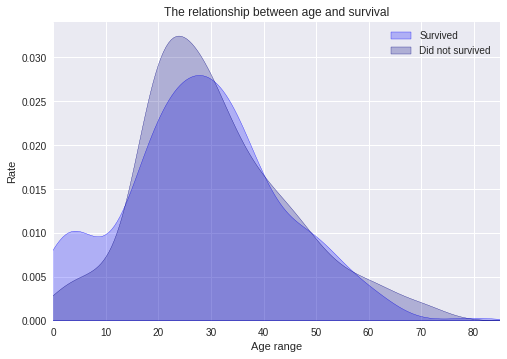

In [ ]:
sns.kdeplot(train_df["OriginAge"][train_df.Survived == 1], color="blue", shade=True)
sns.kdeplot(train_df["OriginAge"][train_df.Survived == 0], color="navy", shade=True)

plt.xlim(0,85)

plt.legend(['Survived', 'Did not survived'])
plt.xlabel('Age range')
plt.ylabel('Rate')
plt.title('The relationship between age and survival')

In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived')


,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features.

Text(0.5, 1.0, 'The relationship between fare and survival')

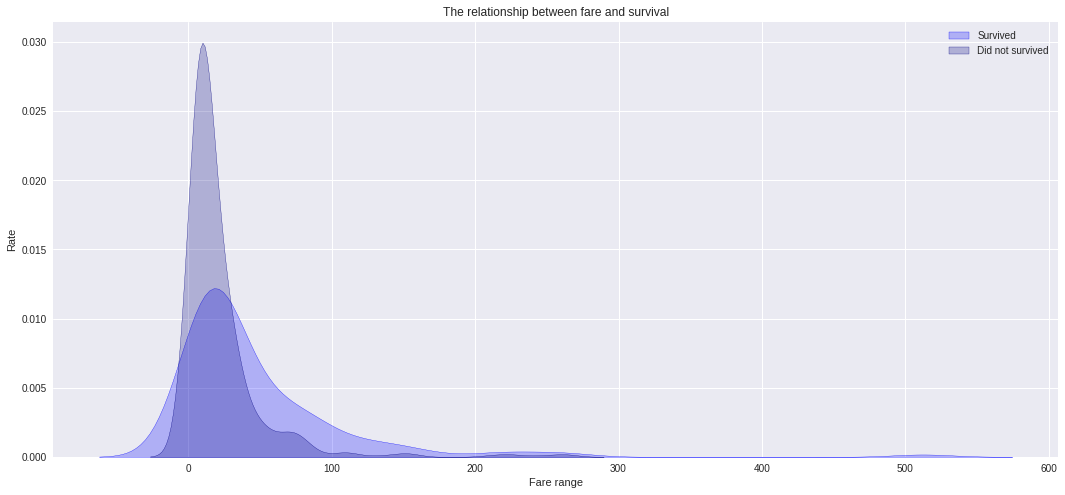

In [ ]:
plt.figure(figsize=(18,8))
sns.kdeplot(train_df["Fare"][train_df.Survived == 1], color="blue", shade=True)
sns.kdeplot(train_df["Fare"][train_df.Survived == 0], color="navy", shade=True)

plt.legend(['Survived', 'Did not survived'])
plt.xlabel('Fare range')
plt.ylabel('Rate')
plt.title('The relationship between fare and survival')

In [ ]:
Embarked_survived = train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()
Embarked_survived

,Embarked,Survived
0,0,0.339009
1,1,0.553571
2,2,0.389610


**Other features**

There are also some attributes we will use in the next, like name, etc.


## 3.3 Readiness of the data



Based on the previous processing, we don’t need to do more processing.  
We choose the attributes we discussed before to make predictions.  

In [ ]:
choose_column = ['Pclass','Sex', 'Age',"Embarked"]

In [ ]:
X_train = train_df[choose_column]
Y_train = train_df["Survived"]
X_test  = test_df[choose_column]
X_train.shape, Y_train.shape, X_test.shape

((891, 4), (891,), (418, 4))

In [ ]:
train_df[choose_column]

,Pclass,Sex,Age,Embarked
0,3,0,1,0
1,1,1,2,1
2,3,1,1,0
3,1,1,2,0
4,3,0,2,0
...,...,...,...,...
886,2,0,1,0
887,1,1,1,0
888,3,1,1,0
889,1,0,1,1


# 4. Modeling

## 4.1 Model

**Model: Decision Tree**  
The reason we chose the decision tree model is that it is the most common machine learning model, and we think it can meet our prediction goal.  
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()


In [ ]:
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)


In [ ]:
acc_decision_tree = decision_tree.score(X_train, Y_train)
acc_decision_tree

0.8271604938271605

## 4.2 Model and Feature

**Currently, 4 features will use in our train model:**

* Pclass

* Sex

* Age

* Embarked 

The reason we choosen these 4 features in our train model is that these 4 attributes have very important meaning.

Later, we will consider the influence of other attributes, such as title, etc. 

In [ ]:
choose_column = ['Pclass','Sex', 'Age',"Embarked"]

## 4.3 Loss Function


---
**Comments**  
You have used decision tree as the model. If you are using sklearn, you should check its document and see what kind of loss function are used to do training.   


**<font color=red>Reply</font>**    
<font color=red>
If $\hat{y}_i$ is the predicted value of the i-th sample and $y_i$ is the corresponding true value, then the fraction of correct predictions over n is defined as

$$\Large
R(\theta) = \frac{1}{n} \sum_{i = 1}^n1( \hat{y}_i-y_i  )
$$
</font>.  

We will use MSE (mean square error) as our loss function.    

$$\Large
R(\theta) = \frac{1}{n} \sum_{i = 1}^n(y_i - \hat{y}_i )^2
$$


In [ ]:
def mean_squared_error(theta, data):
    n = data.size
    return sum((data-theta)**2) / n

Text(0.5, 1.0, 'L2 Loss for different values of $\\theta$')

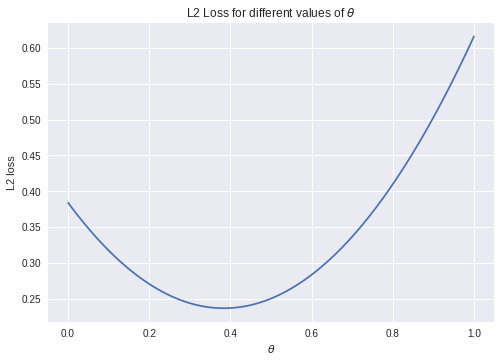

In [ ]:
theta_values = np.linspace(0, 1, 100)
mse = [mean_squared_error(theta, train_df.Survived) for theta in theta_values]
plt.plot(theta_values, mse)
plt.xlabel(r'$\theta$')
plt.ylabel('L2 loss')
plt.title(r'L2 Loss for different values of $\theta$')

**The implement** 

In [ ]:
def l2_survival_risk(theta):
  
    n = Y_pred.shape[0]
    return sum((theta-Y_pred)**2) / n
   

## 4.4 Estimate

`scipy.minimize` is a powerful method that can determine the optimal value of a variety of different functions. In practice, it is used to minimize functions that have no (or difficult to obtain) analytical solutions (it is a **numerical method**).

In [ ]:
from scipy.optimize import minimize


init_thetas = np.zeros(Y_pred.shape[0])
minimized = minimize(l2_survival_risk,init_thetas) 

minimized 

      fun: 1.2915465927964333e-17
 hess_inv: array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])
      jac: array([3.56487110e-11, 3.56487110e-11, 3.56487110e-11, 3.56487110e-11,
       3.56487110e-11, 3.56487110e-11, 7.03133564e-11, 3.56487110e-11,
       7.03133564e-11, 3.56487110e-11, 3.56487110e-11, 3.56487110e-11,
       7.03133564e-11, 3.56487110e-11, 7.03133564e-11, 7.03133564e-11,
       3.56487110e-11, 3.56487110e-11, 3.56487110e-11, 3.56487110e-11,
       3.56487110e-11, 3.56487110e-11, 7.03133564e-11, 3.56487110e-11,
       7.03133564e-11, 3.56487110e-11, 7.03133564e-11, 3.56487110e-11,
       3.56487110e-11, 3.56487110e-11, 3.56487110e-11, 3.56487110e-11,
       3.56487110e-11, 3.56487110e-11, 3.56487110e-11, 3.56487110e-11,
       3.56487110e-11, 3.56487110e-11, 3.56487110e-11, 3.5648711

In [ ]:
theta_hat = minimized['x']
theta_hat

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.00000001, 0.        , 1.00000001, 0.        ,
       0.        , 0.        , 1.00000001, 0.        , 1.00000001,
       1.00000001, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.00000001, 0.        , 1.00000001,
       0.        , 1.00000001, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.00000001, 1.00000001,
       0.        , 0.        , 0.        , 1.00000001, 0.        ,
       0.        , 0.        , 1.00000001, 1.00000001, 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.00000001,
       0.        , 0.        , 0.        , 1.00000001, 1.00000001,
       1.00000001, 1.00000001, 0.        , 0.        , 1.00000001,
       1.00000001, 0.        , 0.        , 0.        , 1.00000

## 4.5 Leaderboard position on Kaggle




**Generate submission file**

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

submission


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('submission.csv', index=False)

**Submission**

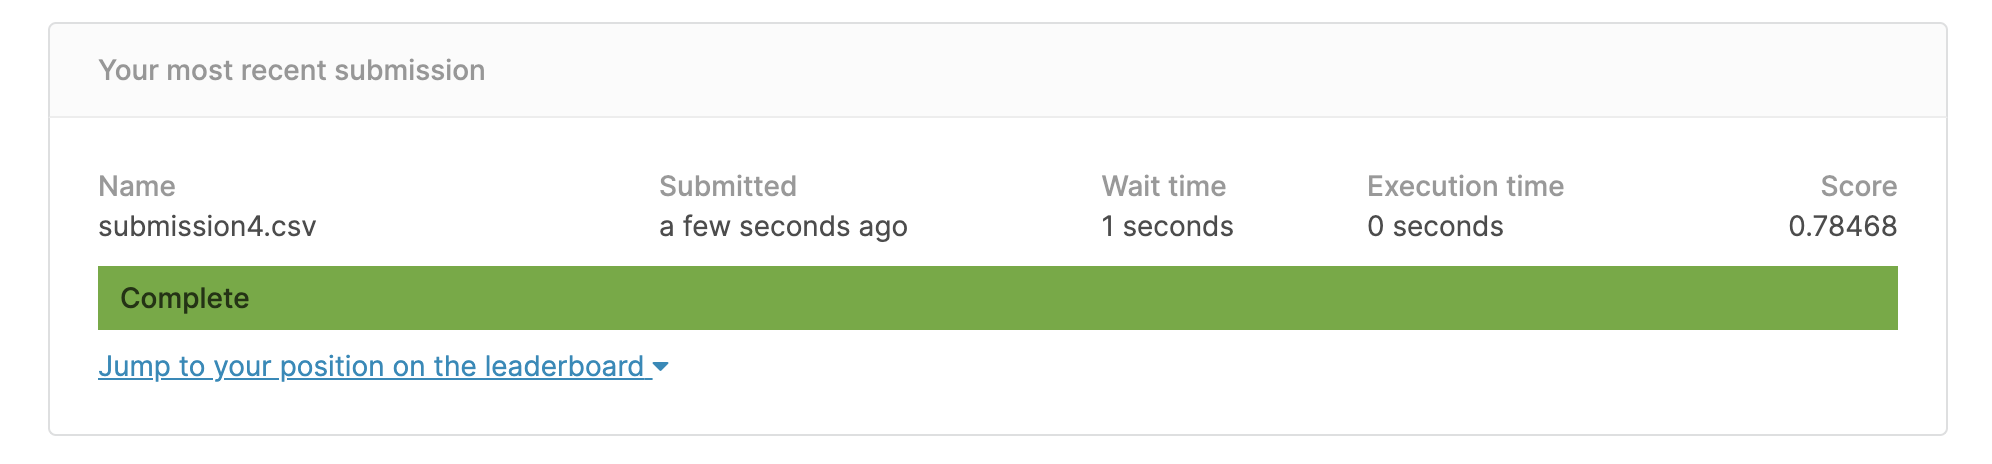

**Leadernboard position**

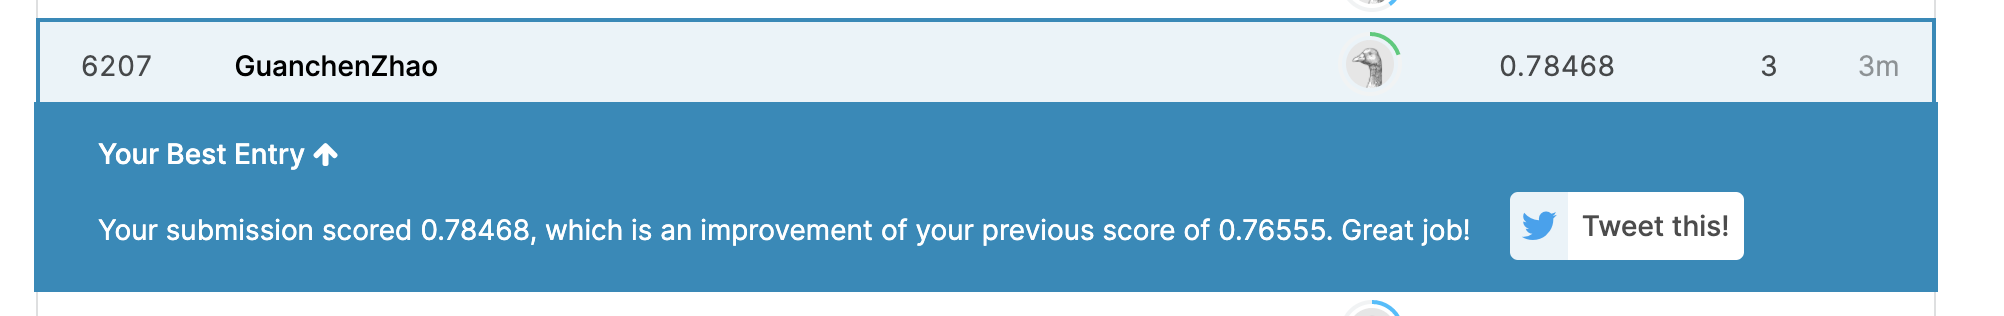

# 5. Inference

## 5.1 Model
The two models are: **Decision Tree** and **RandomForestClassifier**.



**Decision Tree**:
Decision Tree has been described and applied in Project-2.


**RandomForestClassifier**: 
RandomForestClassifier is a random forest classifier.
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if `bootstrap=True` (default), otherwise the whole dataset is used to build each tree

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## 5.2 standard evaluation metric

Because decision trees and random forests belong to classifiers, we choose accuracy as the standard evaluation metric.



**accuracy_score**:  
Accuracy classification score.  
In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

```sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)[source]```

Reference:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=ccuracy_score#sklearn.metrics.accuracy_score

## 5.3  Splitting

In [ ]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(train_df, test_size=0.25, random_state=100)

X_train = train[choose_column].values
Y_train = train["Survived"].values
X_test  = test[choose_column].values
Y_test = test["Survived"].values

print("Training Data Size: ", len(train))
print("Test Data Size: ", len(test))


Training Data Size:  668
Test Data Size:  223


## 5.4 Performance comparison

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
'''
Args:
    modelA and modelB: sklearn models with fit and predict functions 
    X_train (data_frame): Data
    Y_train (data_frame): Label 

Return:
    Accuracy vector containing 5 accuracies for modelA
    Accuracy vector containing 5 accuracies for modelB
    the average accuracy for the 5 splits of modelA
    the average accuracy for the 5 splits of modelB
'''

def compute_CV_accuracy(modelA, modelB, X_train, Y_train):

    kf = KFold(n_splits=5)
    validation_accuracies_A = []
    validation_accuracies_B = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid =  X_train[train_idx],  X_train[valid_idx]
        split_Y_train, split_Y_valid =  Y_train[train_idx],  Y_train[valid_idx]

        # Fit the modelA on the training split
        modelA.fit(split_X_train, split_Y_train)
        
        # Compute the prediction accuracy on the validation split
        X_valid_pred = modelA.predict(split_X_valid)

        # accuracy
        accuracyA = accuracy_score(split_Y_valid, X_valid_pred.round(), normalize=True)
        validation_accuracies_A.append(accuracyA)

        # Fit the modelB on the training split
        modelB.fit(split_X_train, split_Y_train)
        X_valid_pred = modelB.predict(split_X_valid)
        
        # Compute the prediction accuracy on the validation split
        accuracyB = accuracy_score(split_Y_valid, X_valid_pred.round(), normalize=True)
        validation_accuracies_B.append(accuracyB)
        
    return validation_accuracies_A, np.mean(validation_accuracies_A), validation_accuracies_B, np.mean(validation_accuracies_B)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model
# decision_tree definited in part-2
modelA = decision_tree
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
modelB = rfc
# compute_CV_accuracy
validation_accuracies_A, mean_accuracies_A, validation_accuracies_B, mean_accuracies_B = compute_CV_accuracy(modelA, modelB, X_train, Y_train)

# average accuracy
print("the average accuracy of modelA(decision_tree): ",mean_accuracies_A)
print("the average accuracy of modelB(RandomForestClassifier): ",mean_accuracies_B)
winner = "decision_tree" if mean_accuracies_A > mean_accuracies_B  else "RandomForestClassifier"
print(winner,"is better!")

the average accuracy of modelA(decision_tree):  0.8248344742453148
the average accuracy of modelB(RandomForestClassifier):  0.8263270115587475
RandomForestClassifier is better!


Through the comparison of accuracy score, we can conclude that RandomForestClassifier is better.

In [ ]:
from scipy import stats

# significance level
level = 0.05

statistic, pvalue = stats.ttest_ind(validation_accuracies_A, validation_accuracies_B)

# print("statistic:", statistic)
print("pvalue:", pvalue)

result = "pvalue is bigger than 0.05" if pvalue > level  else "pvalue is smaller than 0.05"
print(result)


pvalue: 0.9117551386481355
pvalue is bigger than 0.05


we could find that the pvalue(0.9117551386481355) is more than the significance level 0.05. Therefore, for this case, we could not believe that one is significantly better than another. 

## 5.5 submission

**Generate submission file**

In [ ]:
y = train_df["Survived"]
features = choose_column
X = train_df[choose_column]
X_test = test_df[choose_column]

model = rfc
model.fit(X, y)
predictions = model.predict(X_test)

submission = pd.read_csv('data/gender_submission.csv')
submission['Survived'] = predictions
submission.to_csv('another_submission.csv', index=False)

**new leaderboard position**

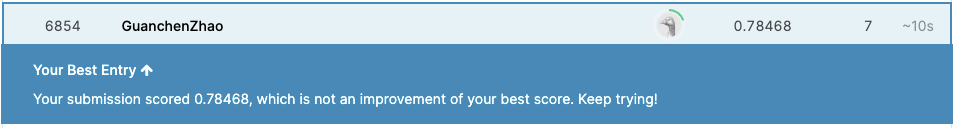

**old leaderboard position**

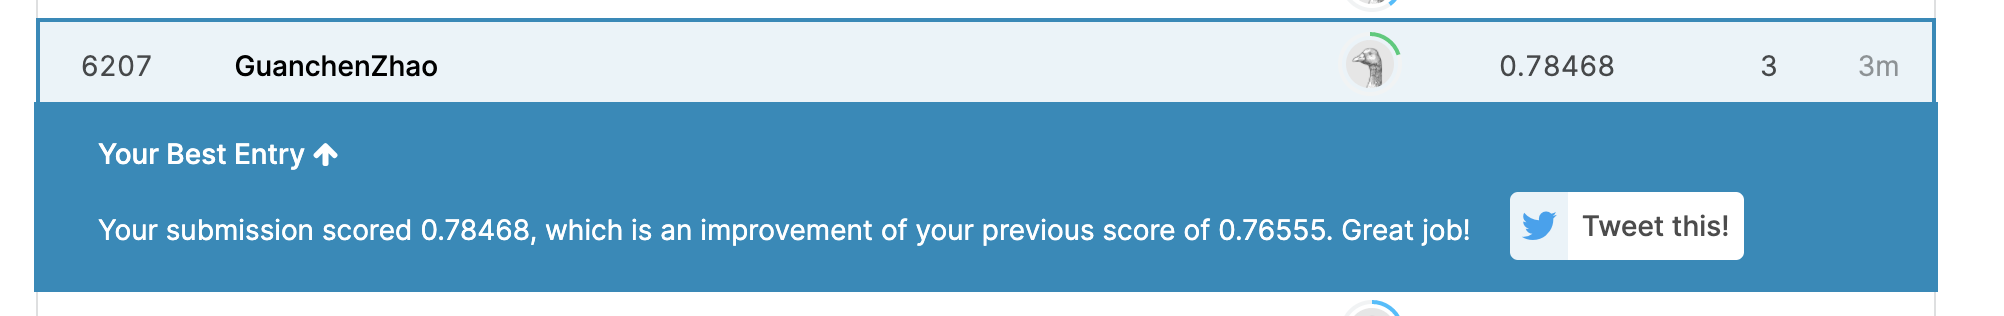

The effect of the two submissions looks the same.

# 6. Conclusion and Learning

## 6.1 Conclusion

The accuracy of our model reaches 82.5%, which proves the important role of data analysis in prediction. Nevertheless, our model still has a lot of room for optimization. Because of time, we have not achieved higher accuracy. We will continue to deepen in the future.

## 6.2 Learning

Nowadays, the application of big data is more and more extensive, it provides more valuable information for every industry. This time through the analysis of the survival rate of the Titanic, I have a deeper understanding of the big data analysis process. In the initial stage, it is necessary to do the data wrangling to ensure that the content of the research is meaningful. Furthermore, it is very important to clean and filter the data before researching the data, which can reduce the deviation. Then I found the rules by constructing the model, learned the use of important functions such as loss function, and how to use A/B test to choose the best solution. This project allowed me to consolidate the content of the entire assignments and gained a lot.*----Deyi*

Through this research project, I came into contact with gaggle, which is an interesting platform, and learned how to deal with problems from my peers. My interest in data analysis has increased.
*----Guanchen*